#### Import podstawowych bibliotek

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

#### Ładowanie danych

##### Zbiór dimDates.csv

In [4]:
dates = pd.read_csv('../dimDates.csv', parse_dates=['dateId'], index_col='dateId')
dates.head()

,datePk,dateYear,dateYearISO,dateMonthYear,dateWeekYearISO,dateQuarterYear,dateMonth,dateDay,dateDaySuffix,dateWeekDay,...,firstDayNoHolidayNoSaturdayAfter,firstDayNoHolidayNoSundayAfter,firstDayNoHolidayNoSaturdayAfterData,firstDayNoSaturdayNoHolidayOrSundayHolidayName,firstDayNoSaturdayNoHolidayOrSundayHolidayIsHoliday,firstDayNoSaturdayNoHolidayOrSundayHoliday,isThuHolyday,isFriHolyday,isSatHolyday,isWeekendParcelServiceBreakInd
dateId,,,,,,,,,,,,,,,,,,,,,
2020-03-26,20200326,2020,2020,2020-03-01,T13-2020,Q1-2020,3,26,th,5,...,20200327,20200327,20200327,FRI,0,20200327,0,0,0,NaN
2021-10-30,20211030,2021,2021,2021-10-01,T43-2021,Q4-2021,10,30,th,7,...,20211031,20211102,20211031,SUN,0,20211031,0,0,0,0.0
2023-01-06,20230106,2023,2023,2023-01-01,T1-2023,Q1-2023,1,6,th,6,...,20230108,20230107,20230108,SUN,0,20230108,0,1,0,0.0
2022-09-30,20220930,2022,2022,2022-09-01,T39-2022,Q3-2022,9,30,th,6,...,20221002,20221001,20221002,SUN,0,20221002,0,0,0,0.0
2022-03-19,20220319,2022,2022,2022-03-01,T11-2022,Q1-2022,3,19,th,7,...,20220320,20220321,20220320,SUN,0,20220320,0,0,0,0.0


##### Zbiór Posting_Volumes

In [5]:
posting_volumes = pd.read_parquet('../Posting_Volumes')
posting_volumes.Date = pd.to_datetime(posting_volumes.Date)
posting_volumes = posting_volumes.set_index('Date')
posting_volumes.head()

,Customer,Product,Volume
Date,,,
2020-01-01,Customer_X,APM,50175.288017
2020-01-01,Customer_X,COURIER,0.000000
2020-01-02,Customer_X,APM,63003.614093
2020-01-02,Customer_X,COURIER,0.000000
2020-01-03,Customer_X,APM,78018.405498


##### Zbiór X_ClientORDERS.xlsx

In [6]:
X_client_orders = pd.read_excel('../X_ClientORDERS.xlsx')
X_client_orders.Date = pd.to_datetime(X_client_orders.Date)
X_client_orders = X_client_orders.set_index('Date')
X_client_orders.head()

,APM_Orders
Date,
2020-01-01,0.000000
2020-01-02,25496.937533
2020-01-03,45748.265366
2020-01-04,0.000000
2020-01-05,0.000000


##### Dane "pogodowe"

In [7]:
path = r'C:\Users\pkowa\inp-main\inp-main\Zadanie_Dane_Temperatura\Zadanie_Dane_Temperatura'
files = os.listdir(path)
temp = pd.DataFrame()

for file in files:
    filename = fr'{path}\{file}'     
    file_df = pd.read_csv(filename, encoding='ISO-8859-1') 
    temp = pd.concat([temp, file_df], axis=0)
print(temp.head())
print(temp.tail())

  Nazwa stacji     Rok  Miesiac  Dzien  Maksymalna temperatura dobowa  \
0       KRAKOW  2021.0      1.0    1.0                            0.5   
1       KRAKOW  2021.0      1.0    2.0                            4.4   
2       KRAKOW  2021.0      1.0    3.0                            4.0   
3       KRAKOW  2021.0      1.0    4.0                            4.9   
4       KRAKOW  2021.0      1.0    5.0                            3.7   

   Minimalna temperatura dobowa  Srednia temperatura dobowa  \
0                          -1.2                        -0.5   
1                          -1.6                         0.8   
2                          -0.9                         1.1   
3                          -0.7                         1.7   
4                           1.4                         2.5   

   Suma dobowa opadow [mm]  Pokrywa sniegu [cm]  249180010  ... 18.0  12  2.0  \
0                      0.0                  0.0        NaN  ...  NaN NaN  NaN   
1                   

Wnioskując po rozmiarach plików, dane od sierpnia 2023 są w innym formacie. Przez co złączenie wszystkich jednocześnie nie zadziała.

In [10]:
df = pd.read_csv(r"C:\Users\pkowa\inp-main\inp-main\Zadanie_Dane_Temperatura\Zadanie_Dane_Temperatura\k_d_08_2023.csv", encoding='windows-1250')
df = df.drop(df.columns[[0,6,8,10,12,14,15,16,17]], axis=1) # sposób pozwalający pozbyć się zbędnych nulli, jednak nie mam pewności, że jest to poprawne założenie, ponieważ nie mam nazw kolumn
df.head()

,PSZCZYNA,2023,08,01,20.4,14.3,17.5,11.8,6.8
0,PSZCZYNA,2023,8,2,24.9,13.2,19.2,12.4,1.3
1,PSZCZYNA,2023,8,3,21.5,16.1,18.4,14.8,2.2
2,PSZCZYNA,2023,8,4,24.0,14.5,19.2,12.4,4.8
3,PSZCZYNA,2023,8,5,20.4,15.2,17.7,15.8,15.4
4,PSZCZYNA,2023,8,6,18.5,14.2,15.6,13.3,26.2


In [11]:
df.PSZCZYNA.unique()

array(['PSZCZYNA', 'BRENNA', 'JABŁONKA', 'POLANA CHOCHOŁOWSKA',
       'RADZIECHOWY', 'ŁAZY', 'JASTRZĘBIA', 'LIMANOWA', 'ŁĄCKO',
       'KROŚCIENKO', 'NIEDZICA', 'BUKOWINA TATRZAŃSKA',
       'DOLINA PIĘCIU STAWÓW', 'PIWNICZNA', 'PORONIN', 'MSZANA DOLNA',
       'DYNÓW', 'SOLINA-JAWOR', 'KOMAŃCZA', 'DRONIOWICE', 'LGOTA GÓRNA',
       'KRAKÓW-OBSERWATORIUM', 'BORUSOWA', 'ŚWIĘTY KRZYŻ', 'STASZÓW',
       'JAROCIN', 'CIESZANÓW', 'STRZYŻÓW', 'CEBER', 'RADZYŃ', 'PUCZNIEW',
       'SKIERNIEWICE', 'JARCZEW', 'PUŁAWY', 'GORZYŃ', 'BABIMOST',
       'WIELICHOWO', 'KOŁUDA WIELKA', 'LEGIONOWO', 'WARSZAWA-FILTRY',
       'PUŁTUSK', 'WARSZAWA-OBSERWATORIUM II', 'SZEPIETOWO', 'BIAŁOWIEŻA',
       'GOLENIÓW', 'CHRZĄSTOWO', 'BIEBRZA-PIEŃCZYKÓWEK', 'MARIANOWO II',
       'RÓŻANYSTOK', 'GDAŃSK-RĘBIECHOWO', 'LIDZBARK WARMIŃSKI', 'OLECKO'],
      dtype=object)

Widzę, że od sierpnia 2023 mamy dane dla większej ilości miast. Dodatkowo w Warszawę i Kraków mamy inaczej zapisane.

In [12]:
columns = pd.read_csv(r"C:\Users\pkowa\inp-main\inp-main\Zadanie_Dane_Temperatura\Zadanie_Dane_Temperatura\k_d_01_2021.csv").columns
row_0 = df.columns
df.columns = columns
pd.DataFrame(list(row_0), list(columns)).T

,Nazwa stacji,Rok,Miesiac,Dzien,Maksymalna temperatura dobowa,Minimalna temperatura dobowa,Srednia temperatura dobowa,Suma dobowa opadow [mm],Pokrywa sniegu [cm]
0,PSZCZYNA,2023,08,01,20.4,14.3,17.5,11.8,6.8


In [13]:
df = pd.concat([pd.DataFrame(list(row_0), list(columns)).T, df], axis=0)
df

,Nazwa stacji,Rok,Miesiac,Dzien,Maksymalna temperatura dobowa,Minimalna temperatura dobowa,Srednia temperatura dobowa,Suma dobowa opadow [mm],Pokrywa sniegu [cm]
0,PSZCZYNA,2023,08,01,20.4,14.3,17.5,11.8,6.8
0,PSZCZYNA,2023,8,2,24.9,13.2,19.2,12.4,1.3
1,PSZCZYNA,2023,8,3,21.5,16.1,18.4,14.8,2.2
2,PSZCZYNA,2023,8,4,24.0,14.5,19.2,12.4,4.8
3,PSZCZYNA,2023,8,5,20.4,15.2,17.7,15.8,15.4
...,...,...,...,...,...,...,...,...,...
1606,OLECKO,2023,8,27,27.1,16.1,21.1,15.7,3.1
1607,OLECKO,2023,8,28,22.8,16.6,19.2,16.8,2.3
1608,OLECKO,2023,8,29,26.1,15.3,19.9,15.2,19.8
1609,OLECKO,2023,8,30,23.7,16.3,19.1,16.6,3.9


Tak prezentuje się czyszczenie danych, które musimy przeprowadzić dla ostatnich 12 msc. Zróbmy to automatycznie dla wszystkich miesięcy.

In [14]:
def clean_data(df):
    df = df.drop(df.columns[[0,6,8,10,12,14,15,16,17]], axis=1)
    row_0 = df.columns
    df.columns = columns
    df = pd.concat([pd.DataFrame(list(row_0), list(columns)).T, df], axis=0)
    return df

In [16]:
path = r'C:\Users\pkowa\inp-main\inp-main\Zadanie_Dane_Temperatura\Zadanie_Dane_Temperatura'
files = os.listdir(path)
temp = pd.DataFrame()
for file in files:
    filename = fr'{path}\{file}'     
    file_df = pd.read_csv(filename, encoding='windows-1250')
    if list(file_df.columns) == list(columns):
        temp = pd.concat([temp, file_df], axis=0)
    else:
        temp = pd.concat([temp, clean_data(file_df)], axis=0)
print(temp.head())
print(temp.tail())

  Nazwa stacji   Rok Miesiac Dzien Maksymalna temperatura dobowa  \
0       KRAKOW  2021       1     1                           0.5   
1       KRAKOW  2021       1     2                           4.4   
2       KRAKOW  2021       1     3                           4.0   
3       KRAKOW  2021       1     4                           4.9   
4       KRAKOW  2021       1     5                           3.7   

  Minimalna temperatura dobowa Srednia temperatura dobowa  \
0                         -1.2                       -0.5   
1                         -1.6                        0.8   
2                         -0.9                        1.1   
3                         -0.7                        1.7   
4                          1.4                        2.5   

  Suma dobowa opadow [mm] Pokrywa sniegu [cm]  
0                     0.0                   0  
1                     0.0                   0  
2                     0.0                   0  
3                     7.1       

In [17]:
cols_to_convert = ['Rok', 'Miesiac', 'Dzien',
       'Maksymalna temperatura dobowa', 'Minimalna temperatura dobowa',
       'Srednia temperatura dobowa', 'Suma dobowa opadow [mm]',
       'Pokrywa sniegu [cm]']

temp[cols_to_convert] = temp[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [18]:
temp.columns

Index(['Nazwa stacji', 'Rok', 'Miesiac', 'Dzien',
       'Maksymalna temperatura dobowa', 'Minimalna temperatura dobowa',
       'Srednia temperatura dobowa', 'Suma dobowa opadow [mm]',
       'Pokrywa sniegu [cm]'],
      dtype='object')

In [19]:
temp.Rok.unique()

array([2021, 2022, 2023, 2024], dtype=int64)

In [20]:
temp.Miesiac.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [21]:
temp.Dzien.unique()

array([ 1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. ,
       12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. ,
       23. , 24. , 25. , 26. , 27. , 28. , 29. , 30. , 31. ,  1.1])

In [22]:
temp.loc[temp['Dzien'] == 1.1, 'Dzien'] = 1

In [23]:
temp.Dzien.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.])

In [24]:
temp['Rok'] = temp['Rok'].astype(int)
temp['Miesiac'] = temp['Miesiac'].astype(int)
temp['Dzien'] = temp['Dzien'].astype(int)

In [25]:
print(temp['Rok'].unique())
print(temp['Miesiac'].unique())
print(temp['Dzien'].unique())

print(temp[['Rok', 'Miesiac', 'Dzien']].isna().sum())
print(temp[['Rok', 'Miesiac', 'Dzien']].dtypes)

[2021 2022 2023 2024]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Rok        0
Miesiac    0
Dzien      0
dtype: int64
Rok        int32
Miesiac    int32
Dzien      int32
dtype: object


In [26]:
temp['Data'] = pd.to_datetime(temp['Rok'].astype(str) + '-' + 
                               temp['Miesiac'].astype(str).str.zfill(2) + '-' + 
                               temp['Dzien'].astype(str).str.zfill(2))

In [27]:
print(temp['Data'].isna().sum())

0


In [28]:
temp.set_index('Data', inplace=True)
temp.drop(columns=['Rok', 'Miesiac', 'Dzien'], inplace=True)

In [29]:
temp['Nazwa stacji'].unique()

array(['KRAKOW', 'WARSZAWA', 'PSZCZYNA', 'BRENNA', 'JABŁONKA',
       'POLANA CHOCHOŁOWSKA', 'RADZIECHOWY', 'ŁAZY', 'JASTRZĘBIA',
       'LIMANOWA', 'ŁĄCKO', 'KROŚCIENKO', 'NIEDZICA',
       'BUKOWINA TATRZAŃSKA', 'DOLINA PIĘCIU STAWÓW', 'PIWNICZNA',
       'PORONIN', 'MSZANA DOLNA', 'DYNÓW', 'SOLINA-JAWOR', 'KOMAŃCZA',
       'DRONIOWICE', 'LGOTA GÓRNA', 'KRAKÓW-OBSERWATORIUM',
       'ŚWIĘTY KRZYŻ', 'STASZÓW', 'JAROCIN', 'STRZYŻÓW', 'CEBER',
       'RADZYŃ', 'PUCZNIEW', 'SKIERNIEWICE', 'JARCZEW', 'GORZYŃ',
       'BABIMOST', 'WIELICHOWO', 'KOŁUDA WIELKA', 'LEGIONOWO',
       'WARSZAWA-FILTRY', 'PUŁTUSK', 'WARSZAWA-OBSERWATORIUM II',
       'SZEPIETOWO', 'BIAŁOWIEŻA', 'GOLENIÓW', 'CHRZĄSTOWO',
       'BIEBRZA-PIEŃCZYKÓWEK', 'MARIANOWO II', 'RÓŻANYSTOK',
       'GDAŃSK-RĘBIECHOWO', 'LIDZBARK WARMIŃSKI', 'OLECKO',
       'PSZCZYNA                      ', 'BRENNA                        ',
       'JABŁONKA                      ', 'POLANA CHOCHOŁOWSKA           ',
       'RADZIECHOWY      

Pozostawiam jedynie Kraków i Warszawę, aby było to zgodne z poleceniem, że 'Dane zbierane są dla dwóch miast: Kraków i Warszawa'. Poza tym dla reszty miast mam dane jedynie za ostatnie 12 msc

In [30]:
temp = temp[temp['Nazwa stacji'].isin(['KRAKOW', 'WARSZAWA', 'WARSZAWA-FILTRY', 'KRAKÓW-OBSERWATORIUM', 'WARSZAWA-OBSERWATORIUM II', 'WARSZAWA-FILTRY               ', 'WARSZAWA-OBSERWATORIUM II     ',
                                      'KRAKÓW-OBSERWATORIUM          '])]
temp['Nazwa stacji'] = temp['Nazwa stacji'].replace(['KRAKÓW-OBSERWATORIUM          ', 'KRAKÓW-OBSERWATORIUM'], 'KRAKOW')
temp['Nazwa stacji'] = temp['Nazwa stacji'].replace(['WARSZAWA-FILTRY', 'WARSZAWA-OBSERWATORIUM II', 'WARSZAWA-FILTRY               ', 'WARSZAWA-OBSERWATORIUM II     '], 'WARSZAWA')
temp['Nazwa stacji'].unique()

array(['KRAKOW', 'WARSZAWA'], dtype=object)

#### Koniec wczytywania danych. Pora na ich wstępną analizę

##### Podstawowe informacje o zbiorach

Zbiory, które mamy to:
- dates
- posting_volumes
- X_client_orders
- temp

In [31]:
datasets = [dates, posting_volumes, X_client_orders, temp]
dataset_names = ['dates', 'posting_volumes', 'X_client_orders', 'temp']

for name, dataset in zip(dataset_names, datasets):
    print(f'ZBIOR: {name}')
    print("""----------------------------------""")
    print(f'{name}_min: {dataset.index.min()}')
    print(f'{name}_max: {dataset.index.max()}')
    print("""----------------------------------""")
    print(f'{name}_shape: {dataset.shape}')
    print("""----------------------------------""")
    print(f'{name}_info: {dataset.info()}')
    print("""
-------------------------------------------------------------------------------------------------------------------
    """)

ZBIOR: dates
----------------------------------
dates_min: 2020-01-01 00:00:00
dates_max: 2024-12-31 00:00:00
----------------------------------
dates_shape: (1827, 41)
----------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-03-26 to 2022-03-31
Data columns (total 41 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   datePk                                               1827 non-null   int64  
 1   dateYear                                             1827 non-null   int64  
 2   dateYearISO                                          1827 non-null   int64  
 3   dateMonthYear                                        1827 non-null   object 
 4   dateWeekYearISO                                      1827 non-null   object 
 5   dateQuarterYear                                      1827 non-null   object 
 6   dateMonth 

#### Łączenie danych

###### Pierwszy połączony zbiór zawiera wszystkie informacje związane z "kalendarzem" oraz zamówieniami

In [40]:
df_total_1 = posting_volumes.join(dates)
print(f'df_total_1.shape: {df_total_1.shape}')
df_total_1.head()

df_total_1.shape: (300128, 44)


,Customer,Product,Volume,datePk,dateYear,dateYearISO,dateMonthYear,dateWeekYearISO,dateQuarterYear,dateMonth,...,firstDayNoHolidayNoSaturdayAfter,firstDayNoHolidayNoSundayAfter,firstDayNoHolidayNoSaturdayAfterData,firstDayNoSaturdayNoHolidayOrSundayHolidayName,firstDayNoSaturdayNoHolidayOrSundayHolidayIsHoliday,firstDayNoSaturdayNoHolidayOrSundayHoliday,isThuHolyday,isFriHolyday,isSatHolyday,isWeekendParcelServiceBreakInd
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Customer_X,APM,50175.288017,20200101,2020,2020,2020-01-01,T1-2020,Q1-2020,1,...,20200102,20200102,20200102,THU,0,20200102,0,0,0,NaN
2020-01-01,Customer_X,COURIER,0.000000,20200101,2020,2020,2020-01-01,T1-2020,Q1-2020,1,...,20200102,20200102,20200102,THU,0,20200102,0,0,0,NaN
2020-01-01,Customer_A1,APM,2536.972228,20200101,2020,2020,2020-01-01,T1-2020,Q1-2020,1,...,20200102,20200102,20200102,THU,0,20200102,0,0,0,NaN
2020-01-01,Customer_A1,COURIER,584.795076,20200101,2020,2020,2020-01-01,T1-2020,Q1-2020,1,...,20200102,20200102,20200102,THU,0,20200102,0,0,0,NaN
2020-01-01,Customer_A2,APM,615.490119,20200101,2020,2020,2020-01-01,T1-2020,Q1-2020,1,...,20200102,20200102,20200102,THU,0,20200102,0,0,0,NaN


###### Drugi połączony zbiór zawiera informacje związane z zamówieniami klienta X na produkcie APM. Na podstawie tego można porównanać wartości rzeczywiste oraz te deklarowane przez klienta. Prawdopodobnie patrzenie na te dane miałoby sens od 2023, ponieważ zgodnie z mailem od wtedy dostajemy dane od klienta. Nie wiem zatem czym są wcześniejsze wartości. Tutaj również możnaby dołączyć oczywiście informacje o datach.

In [45]:
df_total_2 = posting_volumes[(posting_volumes.Customer == 'Customer_X') & (posting_volumes.Product == 'APM')].join(X_client_orders)
print(f'df_total_2.shape: {df_total_2.shape}')
df_total_2.head()

df_total_2.shape: (1674, 4)


,Customer,Product,Volume,APM_Orders
Date,,,,
2020-01-01,Customer_X,APM,50175.288017,0.000000
2020-01-02,Customer_X,APM,63003.614093,25496.937533
2020-01-03,Customer_X,APM,78018.405498,45748.265366
2020-01-04,Customer_X,APM,15240.927118,0.000000
2020-01-05,Customer_X,APM,19668.614982,0.000000


###### Trzeci zestaw to połączenie informacji pogodowych z datowymi.

In [46]:
df_total_3 = temp.join(dates)
print(f'df_total_3.shape: {df_total_3.shape}')
df_total_3.head()

df_total_3.shape: (2982, 47)


,Nazwa stacji,Maksymalna temperatura dobowa,Minimalna temperatura dobowa,Srednia temperatura dobowa,Suma dobowa opadow [mm],Pokrywa sniegu [cm],datePk,dateYear,dateYearISO,dateMonthYear,...,firstDayNoHolidayNoSaturdayAfter,firstDayNoHolidayNoSundayAfter,firstDayNoHolidayNoSaturdayAfterData,firstDayNoSaturdayNoHolidayOrSundayHolidayName,firstDayNoSaturdayNoHolidayOrSundayHolidayIsHoliday,firstDayNoSaturdayNoHolidayOrSundayHoliday,isThuHolyday,isFriHolyday,isSatHolyday,isWeekendParcelServiceBreakInd
Data,,,,,,,,,,,,,,,,,,,,,
2021-01-01,KRAKOW,0.5,-1.2,-0.5,0.0,0.0,20210101,2021,2020,2021-01-01,...,20210103,20210102,20210103,SUN,0,20210103,1,1,0,0.0
2021-01-01,WARSZAWA,0.9,-1.2,-0.2,0.0,0.0,20210101,2021,2020,2021-01-01,...,20210103,20210102,20210103,SUN,0,20210103,1,1,0,0.0
2021-01-02,KRAKOW,4.4,-1.6,0.8,0.0,0.0,20210102,2021,2020,2021-01-01,...,20210103,20210104,20210103,SUN,0,20210103,1,1,0,1.0
2021-01-02,WARSZAWA,1.2,-0.9,0.3,0.0,0.0,20210102,2021,2020,2021-01-01,...,20210103,20210104,20210103,SUN,0,20210103,1,1,0,1.0
2021-01-03,KRAKOW,4.0,-0.9,1.1,0.0,0.0,20210103,2021,2020,2021-01-01,...,20210104,20210104,20210104,MON,0,20210104,0,0,0,0.0


#### Przykładowa prognoza

##### 1. Poziom agregacji - miesięczny dla wszystkich klientów łącznie. Podejście stricte ekonometryczne, bez użycia dodatkowych zmiennych

###### Ogólne zerknęcie na dane

In [47]:
posting_volumes.describe()

,Volume
count,300128.000000
mean,1400.914831
std,4669.401384
min,0.000000
25%,0.000000
50%,0.000000
75%,1517.930740
max,187936.574098


In [48]:
posting_volumes.Customer.unique()

array(['Customer_X', 'Customer_A1', 'Customer_A2', 'Customer_A3',
       'Customer_A4', 'Customer_A5', 'Customer_A6', 'Customer_A7',
       'Customer_A8', 'Customer_A9', 'Customer_A10', 'Customer_A11',
       'Customer_A12', 'Customer_A13', 'Customer_A14', 'Customer_A15',
       'Customer_A16', 'Customer_A17', 'Customer_A18', 'Customer_A19',
       'Customer_A20', 'Customer_A21', 'Customer_A22', 'Customer_A23',
       'Customer_A24', 'Customer_A25', 'Customer_A26', 'Customer_A27',
       'Customer_A28', 'Customer_A29', 'Customer_A30', 'Customer_A31',
       'Customer_A32', 'Customer_A33', 'Customer_A34', 'Customer_A35',
       'Customer_A36', 'Customer_A37', 'Customer_A38', 'Customer_A39',
       'Customer_A40', 'Customer_A41', 'Customer_A42', 'Customer_A43',
       'Customer_A44', 'Customer_A45', 'Customer_A46', 'Customer_A47',
       'Customer_A48', 'Customer_A49', 'Customer_A50', 'Customer_A51',
       'Customer_A52', 'Customer_A53', 'Customer_A54', 'Customer_A55',
       'Customer_

###### Wizulizacje pomagające lepiej zrozumieć problem

<Axes: xlabel='Customer'>

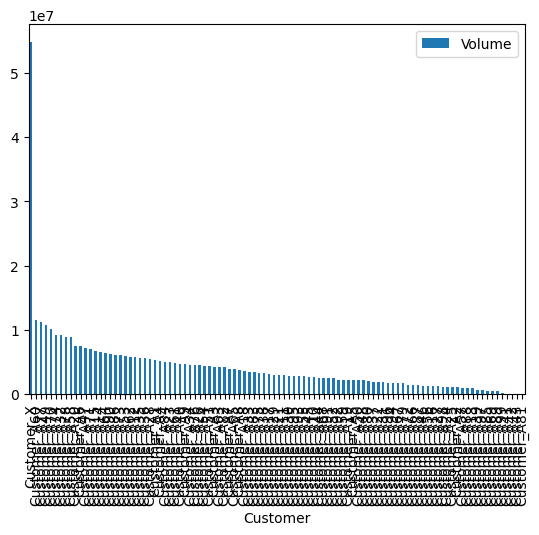

In [49]:
posting_volumes.drop(columns=['Product']).groupby('Customer').sum().sort_values(by = 'Volume', ascending=False).plot(kind='bar')

<Axes: xlabel='Date'>

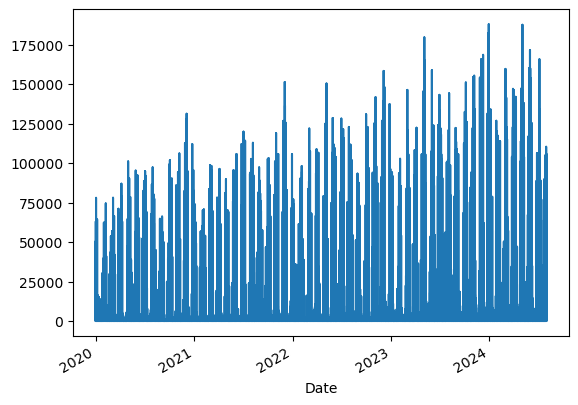

In [50]:
posting_volumes.Volume.plot(kind='line')

In [51]:
volumes_grouped = posting_volumes.Volume.resample('MS').sum().to_frame('Volume')
volumes_grouped['Month'] = volumes_grouped.index.month
volumes_grouped.head()

,Volume,Month
Date,,
2020-01-01,4.508089e+06,1
2020-02-01,3.613685e+06,2
2020-03-01,4.772283e+06,3
2020-04-01,4.541641e+06,4
2020-05-01,6.373724e+06,5


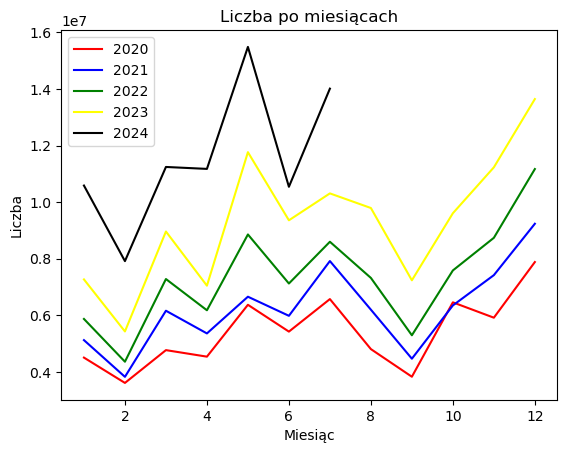

In [52]:
fig, ax = plt.subplots()
colors= ['red', 'blue', 'green', 'yellow', 'black']
years = [2020, 2021, 2022, 2023, 2024]
for c, year in zip(colors, years):
    ax.plot(volumes_grouped[volumes_grouped.index.year == year].Month,
            volumes_grouped[volumes_grouped.index.year == year]['Volume'],
            color=c, label=str(year))
ax.legend()
ax.set_xlabel('Miesiąc')
ax.set_ylabel('Liczba')

ax.set_title('Liczba po miesiącach')
plt.show()

Sprawdźmy jak będzie prezentowała się ta wartość po uwzględnieniu dni roboczych w każdym miesiącu.

In [53]:
dates['isWorkDay'] = (dates['dateIsWeekend'] == False) & (dates['dateIsHolidayInd'] == False)
dni_robocze_per_month = dates[dates['isWorkDay']].groupby('dateMonthYear').size().to_frame('Liczba_dni_roboczych')
dni_robocze_per_month.index = pd.to_datetime(dni_robocze_per_month.index)
dni_robocze_per_month.head()

,Liczba_dni_roboczych
dateMonthYear,
2020-01-01,21
2020-02-01,20
2020-03-01,22
2020-04-01,21
2020-05-01,20


Będę posługiwał się zwrotem 'pwd' jako 'per working days'

In [54]:
volumes_grouped_pwd = volumes_grouped.join(dni_robocze_per_month)
volumes_grouped_pwd['VolumePWD'] = volumes_grouped_pwd['Volume'] / volumes_grouped_pwd.Liczba_dni_roboczych

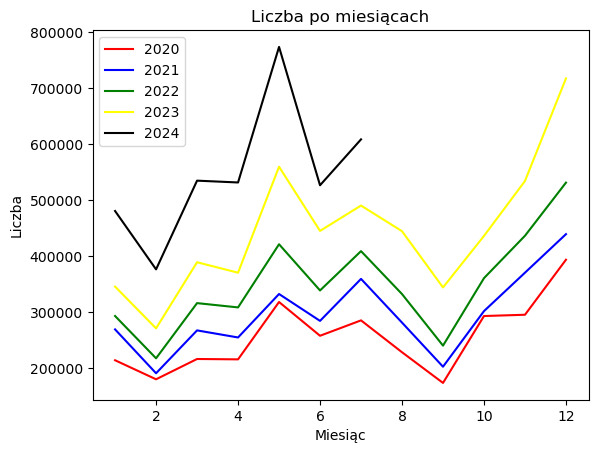

In [55]:
fig, ax = plt.subplots()
colors= ['red', 'blue', 'green', 'yellow', 'black']
years = [2020, 2021, 2022, 2023, 2024]
for c, year in zip(colors, years):
    ax.plot(volumes_grouped_pwd[volumes_grouped_pwd.index.year == year].Month,
            volumes_grouped_pwd[volumes_grouped_pwd.index.year == year]['VolumePWD'],
            color=c, label=str(year))
ax.legend()
ax.set_xlabel('Miesiąc')
ax.set_ylabel('Liczba')

ax.set_title('Liczba po miesiącach')
plt.show()

Widać, że po skorygowaniu danych o liczbę dni roboczych, sezonowość jest jeszcze bardziej widoczna

###### Badanie stacjonarności

Do badania stacjonarności skorzystam z rozszerzonego testu Dickey-Fullera

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(volumes_grouped.Volume)
result_pwd = adfuller(volumes_grouped_pwd.VolumePWD)

print(f'p-value dla pierwszego szeregu: {result[1]}')
print(f'p-value dla skorygowanego szeregu: {result_pwd[1]}')

In [39]:
volumes_grouped_pwd['Volume_diff'] = volumes_grouped_pwd['VolumePWD'].diff()
volumes_grouped_pwd_diff = volumes_grouped_pwd.dropna()
result_diff = adfuller(volumes_grouped_pwd_diff['Volume_diff'])
print(f'p-value dla różnicowanego szeregu: {result_diff[1]}')

p-value dla różnicowanego szeregu: 0.9203032827484563


In [40]:
volumes_grouped_pwd_diff_2 = volumes_grouped_pwd_diff['Volume_diff'].diff().dropna().to_frame('Volume_diff')
result_diff = adfuller(volumes_grouped_pwd_diff_2['Volume_diff'])
print(f'p-value dla podwójnie różnicowanego szeregu: {result_diff[1]}')

p-value dla podwójnie różnicowanego szeregu: 0.0011376993226563624


<Axes: xlabel='Date'>

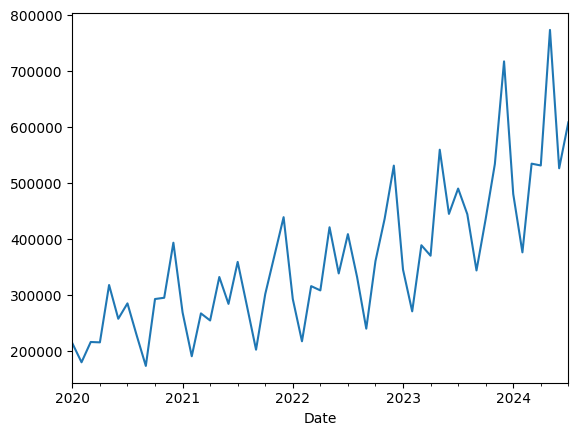

In [41]:
volumes_grouped_pwd.VolumePWD.plot()

<Axes: xlabel='Date'>

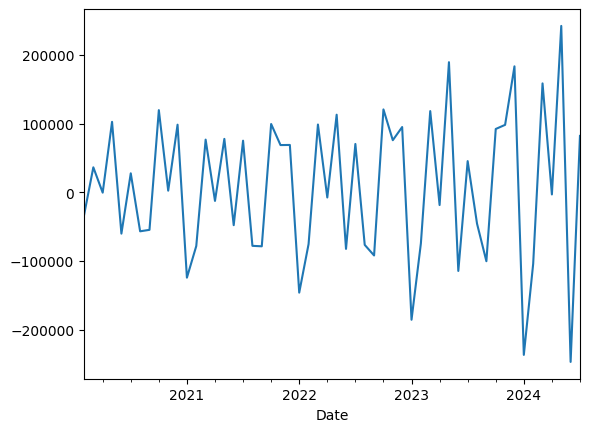

In [42]:
volumes_grouped_pwd_diff['Volume_diff'].plot()

<Axes: xlabel='Date'>

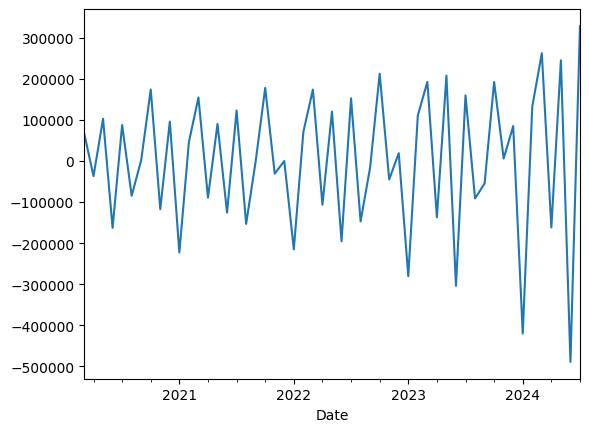

In [43]:
volumes_grouped_pwd_diff_2['Volume_diff'].plot()

Dopiero szereg czasowy podwójnie zróżnicowany jest stacjonarny tj.:

x = y_t - y_t-1 - (2 * y_t-1 - y_t-2) <=> x = y_t - 2 * y_t-1 + y_t-2

P-value z testu Dickey-Fullera to 0,001, a zatem jest mniejsze niż 0.05.
Przy założeniu, że H0: Beta = 0 (niestacjonarny) oraz H1: Beta < 0 (stacjonarny). Możemy odrzucić H0 na rzecz H1.

###### Stwórzmy pierwszy model ARIMA

Chciałem skorzystać z biblioteki pmdarima do znalezienia optymalnych parametrów, jednak mam niezgodność wersji bibliotek. Ze względu na krótki czas na wykonanie zadania, piszę kod ręcznie, co nie jest optymalne

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
data = volumes_grouped_pwd_diff_2['Volume_diff']

In [46]:
order_aic_bic = []
for p in range(13):
    print(p) # Aby kontrolować czy komputer nie wybuchł ;)
    for q in range(13):
        try:
            model = ARIMA(data, order=(p,0,q))
            results = model.fit()
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            pass

0
1
2


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

4


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

5


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

6


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

7


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

8


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

9


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

10


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

11


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

12


C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

In [47]:
order_df = pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])
print(f'Najlepszy model pod kątem AIC: {order_df.sort_values('aic').head(1)}')
print(f'Najlepszy model pod kątem BIC: {order_df.sort_values('bic').head(1)}')

Najlepszy model pod kątem AIC:       p  q          aic          bic
158  12  2  1293.275802  1324.800473
Najlepszy model pod kątem BIC:       p  q          aic          bic
157  12  1  1294.546734  1324.101112


##### Wybieram model (12,0,2), ponieważ kryterium Akaike'a jest lepszym krytrium do wyboru modelu predykcyjnego.
Bayes'a jest lepsze do modeli "wyjaśniających".

In [48]:
model = ARIMA(data, order=(12,0,2))
results = model.fit()

C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 640x480 with 0 Axes>

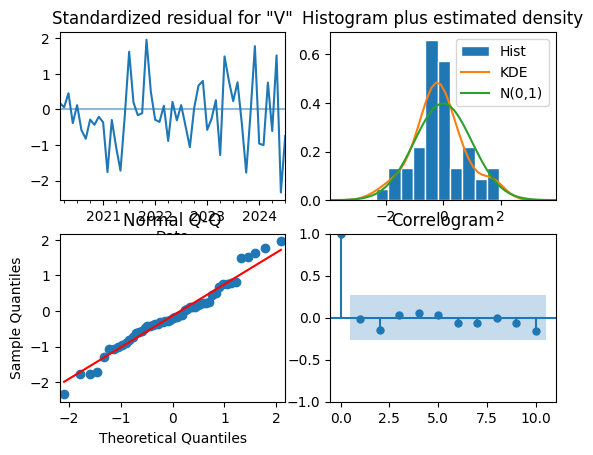

In [49]:
plt.clf()
results.plot_diagnostics()
plt.show()

Reszty rozkładają się normalnie, brak korelacji reszt

In [50]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Volume_diff   No. Observations:                   53
Model:                ARIMA(12, 0, 2)   Log Likelihood                -630.638
Date:                Thu, 10 Oct 2024   AIC                           1293.276
Time:                        07:51:59   BIC                           1324.800
Sample:                    03-01-2020   HQIC                          1305.399
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2187.9652   4205.851      0.520      0.603   -6055.352    1.04e+04
ar.L1         -0.0988      0.190     -0.520      0.603      -0.471       0.274
ar.L2         -0.2038      0.158     -1.293      0.1

Prob(Q) jest większe niż 0,05 zatem reszty nie są ze sobą skorelowane.
Prob(JB) jest większe niż 0,05 zatem reszty rozkładają się normalnie.

In [51]:
forecast = results.get_forecast(12)

In [52]:
forecast.conf_int()

,lower Volume_diff,upper Volume_diff
2024-08-01,-150421.384738,-33376.122780
2024-09-01,-171404.747281,71487.945726
2024-10-01,37088.260478,296912.499883
2024-11-01,-202951.791462,56882.186298
2024-12-01,34941.583026,297017.806759
2025-01-01,-540357.580924,-278261.389895
2025-02-01,-37209.873594,227792.947014
2025-03-01,121519.385627,388181.742540
2025-04-01,-241228.771339,26111.952100
2025-05-01,75664.188565,343086.539187


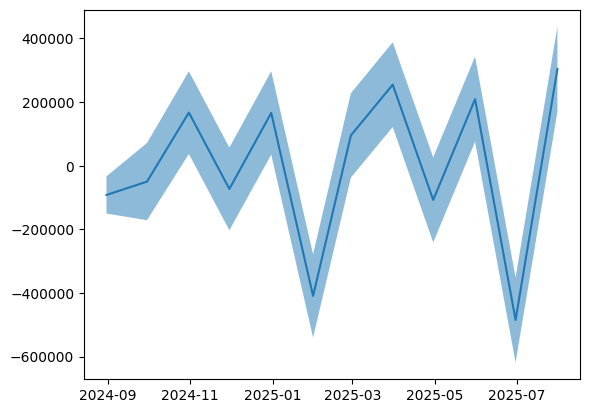

In [53]:
plt.figure()
plt.plot(pd.date_range(start='2024-08-01', periods=12, freq='M'), forecast.predicted_mean)
plt.fill_between(pd.date_range(start='2024-08-01', periods=12, freq='M'), forecast.conf_int()['lower Volume_diff'], forecast.conf_int()['upper Volume_diff'], alpha=0.5)

In [54]:
from statsmodels.graphics.tsaplots import plot_predict

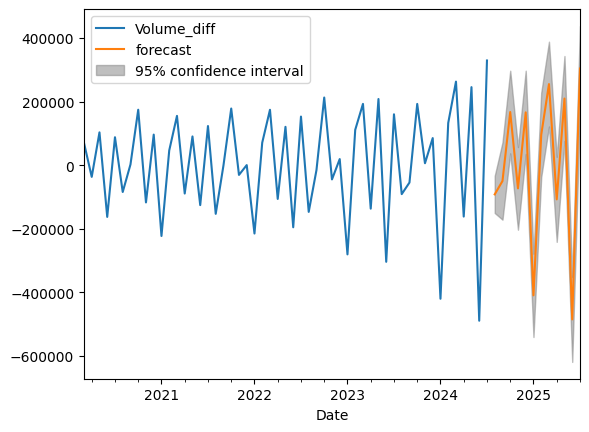

In [55]:
fig, ax = plt.subplots()
data.plot(ax = ax)
plot_predict(results, start = '2024-08-01', end = '2025-07-01', alpha = 0.05, ax=ax)
plt.show()

Przywrócenie wartości do bazowej postaci

In [56]:
from numpy import cumsum

mean_forecast_diff = cumsum(forecast.predicted_mean) + volumes_grouped_pwd_diff.iloc[-1,4]

In [57]:
mean_forecast = cumsum(mean_forecast_diff) + volumes_grouped_pwd.iloc[-1,3]

In [58]:
mean_forecast

2024-08-01    599183.357334
2024-09-01    539301.723844
2024-10-01    646420.470535
2024-11-01    680504.414643
2024-12-01    880568.053644
2025-01-01    671322.207236
2025-02-01    557367.897537
2025-03-01    698264.151922
2025-04-01    731601.996688
2025-05-01    974315.205329
2025-06-01    732134.905368
2025-07-01    793885.239163
Freq: MS, Name: predicted_mean, dtype: float64

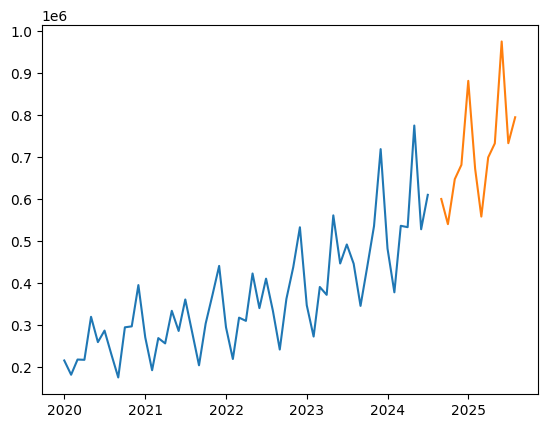

In [59]:
plt.figure()
plt.plot(volumes_grouped_pwd.index, volumes_grouped_pwd.VolumePWD)
plt.plot(pd.date_range(start='2024-08-01', periods=12, freq='M'), mean_forecast)
plt.show()

*tutaj należałoby jeszcze oczywiście przemnożyć wartości przez liczbę dn, aby otrzymać prognozę miesięczną, a nie średnią dzienną wartość w danym miesiącu, jednak w dimDates mam dane tylko do końca 2024 i wolę czas poświęcić na dalszą analizę niż na ręczne liczenie brakujących miesięcy*

##### 2. Poziom agregacji - dzienny dla wszystkich klientów łącznie. Podejście stricte ekonometryczne, bez użycia dodatkowych zmiennych

###### Wizualizacje

In [118]:
volumes_grouped = posting_volumes.drop(columns=['Customer','Product'])
volumes_grouped = volumes_grouped.groupby('Date').sum()
volumes_grouped = volumes_grouped.join(dates[['dateDayOfYear']])
volumes_grouped.head()

,Volume,dateDayOfYear
Date,,
2020-01-01,300251.227418,1
2020-01-02,396882.527245,2
2020-01-03,451790.208144,3
2020-01-04,401165.796588,4
2020-01-05,116613.234527,5


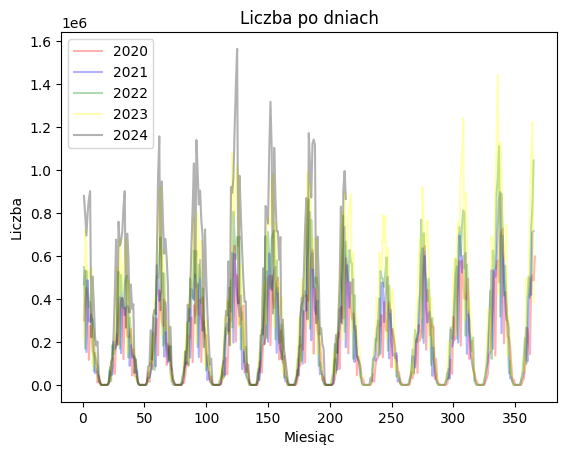

In [119]:
fig, ax = plt.subplots()
colors= ['red', 'blue', 'green', 'yellow', 'black']
years = [2020, 2021, 2022, 2023, 2024]
for c, year in zip(colors, years):
    ax.plot(volumes_grouped[volumes_grouped.index.year == year].dateDayOfYear,
            volumes_grouped[volumes_grouped.index.year == year]['Volume'],
            color=c, label=str(year), alpha=0.3)
ax.legend()
ax.set_xlabel('Miesiąc')
ax.set_ylabel('Liczba')

ax.set_title('Liczba po dniach')
plt.show()

###### Stacjonarność

In [120]:
result = adfuller(volumes_grouped.Volume)
print(f'p-value dla pierwszego szeregu: {result[1]}')

p-value dla pierwszego szeregu: 0.02540046191476806


In [121]:
volumes_grouped['Volume_diff'] = volumes_grouped['Volume'].diff()
volumes_grouped_diff = volumes_grouped.dropna()
result_diff = adfuller(volumes_grouped_diff['Volume_diff'])
print(f'p-value dla różnicowanego szeregu: {result_diff[1]}')

p-value dla różnicowanego szeregu: 0.0


<Axes: xlabel='Date'>

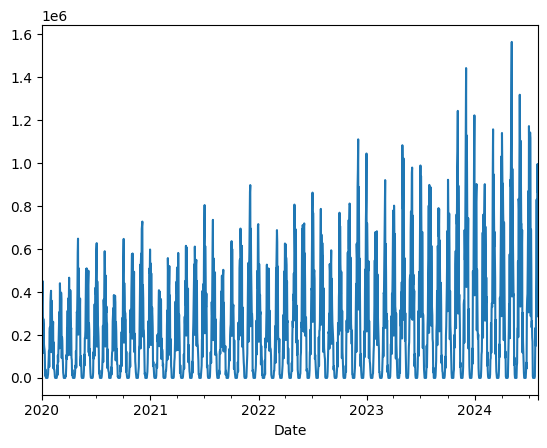

In [122]:
volumes_grouped.Volume.plot()

<Axes: xlabel='Date'>

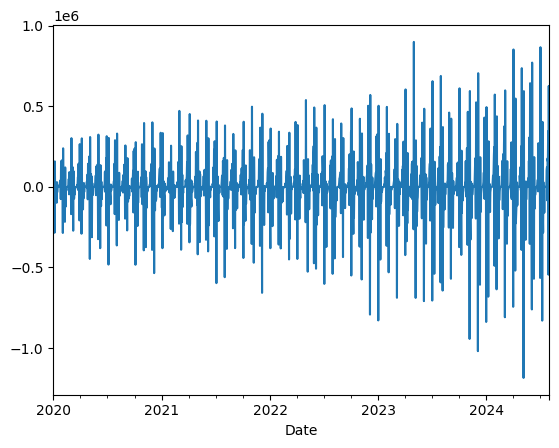

In [123]:
volumes_grouped['Volume_diff'].plot()

Teoretycznie moglibyśmy wykorzystać dane bez przetwarzania, jednak po transformacji szereg jest jeszcze bardziej stacjonarny

###### Model

Ze względu na braki mocy obliczeniowej nie mogę wykonać wyszukania optymalnej kombinacji parametrów

Postaram się cokolwiek wykonać poprzez analizę ACF i PACF

In [124]:
data = volumes_grouped_diff['Volume_diff']

<Figure size 640x480 with 0 Axes>

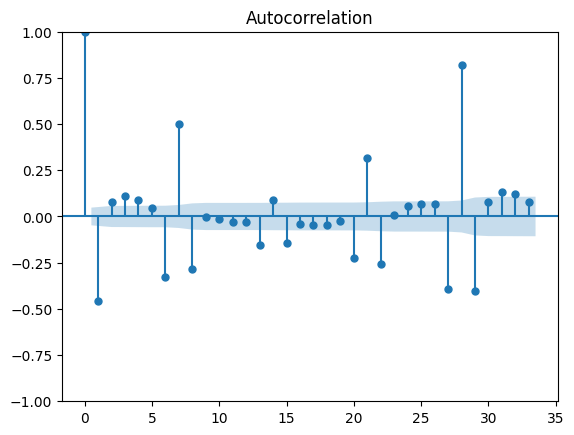

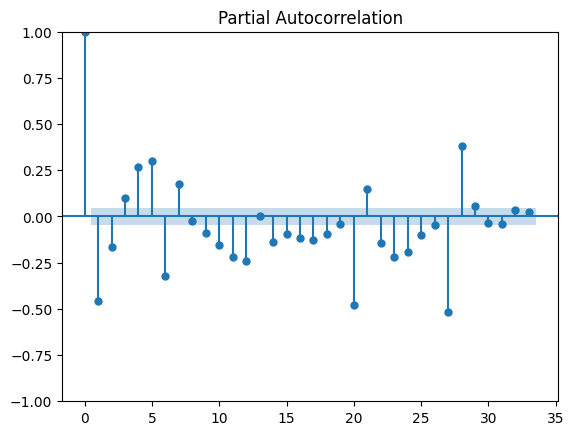

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.clf()
plot_acf(data)
plot_pacf(data)
plt.show()

Na podstawie wykresów autokorelacji i częściowej autokorelacji nie jesteśmy jednak w stanie prawidłowo wybrać p i q

In [135]:
data.index.freq = 'D'

C:\Users\user\Zadanie_Rekrutacyjne2024\Zadanie_Rekrutacyjne2024\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 640x480 with 0 Axes>

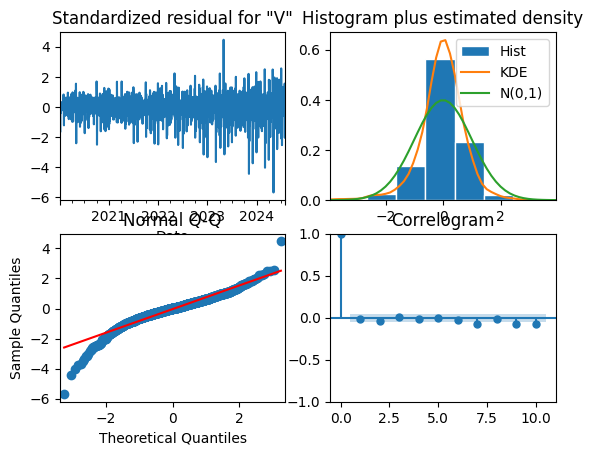

                               SARIMAX Results                                
Dep. Variable:            Volume_diff   No. Observations:                 1673
Model:                ARIMA(7, 0, 27)   Log Likelihood              -21776.100
Date:                Thu, 10 Oct 2024   AIC                          43624.201
Time:                        08:54:58   BIC                          43819.406
Sample:                    01-02-2020   HQIC                         43696.525
                         - 07-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        338.2328    271.908      1.244      0.214    -194.698     871.163
ar.L1         -0.9891      0.082    -12.074      0.000      -1.150      -0.829
ar.L2         -0.3096      0.084     -3.675      0.0

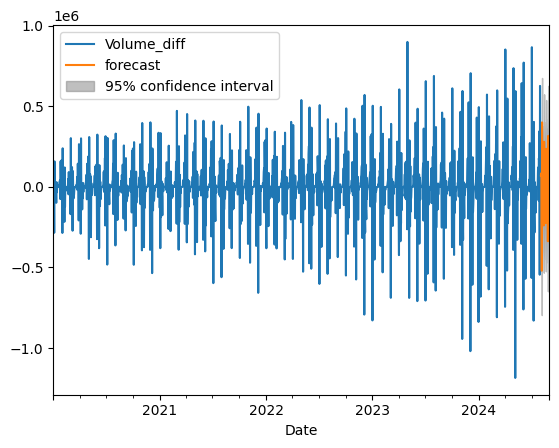

In [149]:
order_aic_bic = []
# * TODO Uruchomić zakomentowany frament kodu * 
# for p in range(32):
#     print(p) # do sprawdzania czy mi komputer nie eksplodował :)
#     for q in range(32):
#         try:
#             model = ARIMA(data, order=(p,0,q))
#             results = model.fit()
#             order_aic_bic.append((p, q, results.aic, results.bic))
#         except:
#             pass
# order_df = pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])

# best_params = order_df.sort_values('aic').head(1)

# model = ARIMA(data, order=(best_params.aic,0,best_params.q))

model = ARIMA(data, order=(7,0,27))
results = model.fit()

plt.clf()
results.plot_diagnostics()
plt.show()

print(results.summary())

forecast = results.get_forecast(30)

fig, ax = plt.subplots()
data.plot(ax = ax)
plot_predict(results, start = '2024-08-01', end = '2024-08-30', alpha = 0.05, ax=ax)
plt.show()

mean_forecast = cumsum(forecast.predicted_mean) + volumes_grouped_diff.iloc[-1,0]

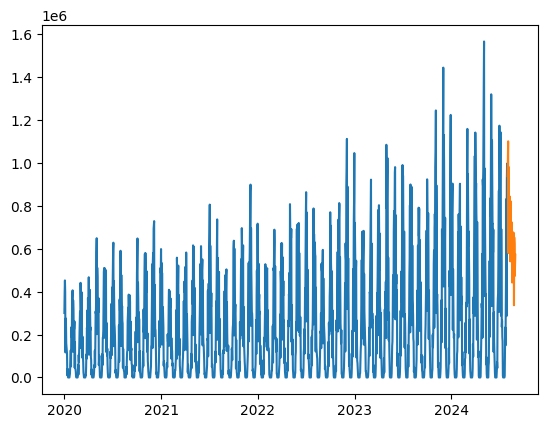

In [150]:
plt.figure()
plt.plot(volumes_grouped.index, volumes_grouped['Volume'])
plt.plot(pd.date_range(start='2024-08-01', periods=30, freq='D'), mean_forecast)
plt.show()